<a href="https://colab.research.google.com/github/racingstats/Constructor-Standings-Web-Scraping/blob/main/Scrape%20Constructor%20Championship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping the F1 Constructor Championship information

## 1. Introduction
Suppose that we're interested in the F1 constructor championship to see how our favourite team is doing, we could look at the official F1 website following [this&nbsp;link](https://www.formula1.com/en/results.html/2020/team.html). This website only has a table with the positions, team names and points scored. This is good to know but there might be more interesting things that we can do with that data. We might be interested in plotting the data to have a better idea how the ranking stacks up or we might want to check what the gaps are to our favourite team,... One thing we could do is create an Excel file with a table in which we manually fill in the values. Doing this for once for one table of 10 values is very easy but it would be a very inconvenient practice if we for example wanted to get the points and positions of the last 20 years. This is where web scraping can help us and we'll show you how to do this here.

### 1.1 What is web scraping
The term web scraping usually refers to an automated process of gathering information from the internet. This requires some work setting it up but once we're talking about getting a lot of data or getting information regularly, it can save you a lot of time and spare you from a lot of tedious work.<br>
In short, we'll write code to send a request to, in this case, the F1 website's constructor championship standings page. We'll be able to get the source code of that web page just like your browser would. Then we can go through this source code to filter out the interesting bits of data. If we're looking for a table, we can look for a \<table> tag in the code or we might be interested in a certain \<div> with a certain class.

### 1.2 First look at the page
Now let's have a look at the page we're interested in (https://www.formula1.com/en/results.html/2020/team.html). On this page we have the table with the points per team. For the current season, it has the points won in that season up until this point. It's also possible to look at the standings of previous seasons by clicking on the year list on the left. If we would click on those years, we could see that the url stays the same as the one on the 2020 page except the bit after results.html. So the year. This is something that we might be able to exploit later on.

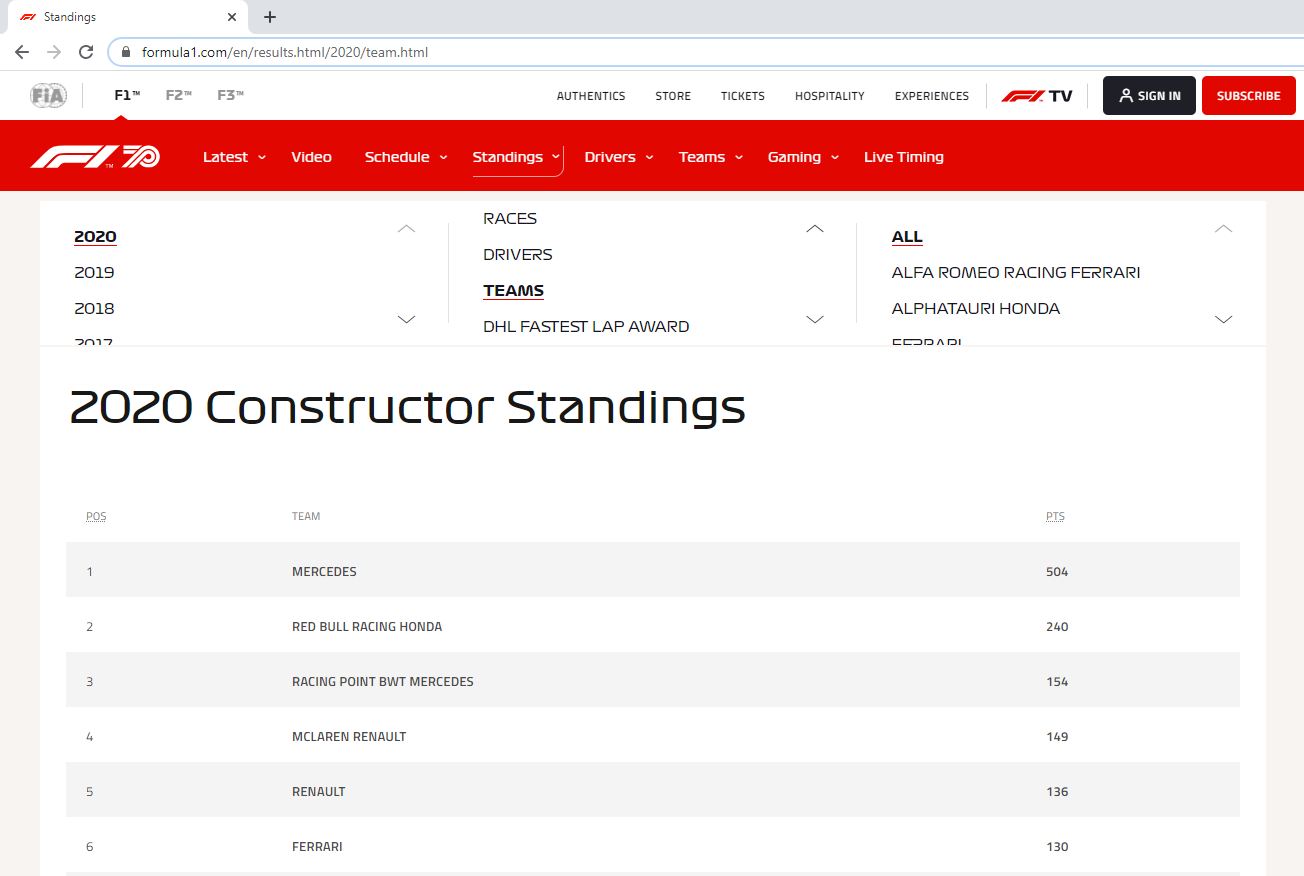

To find what we're interested in, we can use the chrome developer tools when you're using the Google Chrome web browser. We right click on the information that we're interested in. In this case a value in the table. And then we click "Inspect". This should open up the developer tools. There's an example of what you would see down here. In this case, we right clicked on the "Mercedes" cell. On the right we see the html code where the bit representing that cell is marked. We can see that the Mercedes text is in an \<a> tag so it's a hyperlink. Then if we move up a little bit in the html structure, we can see the \<table> tag. 
We'll look for this later on.

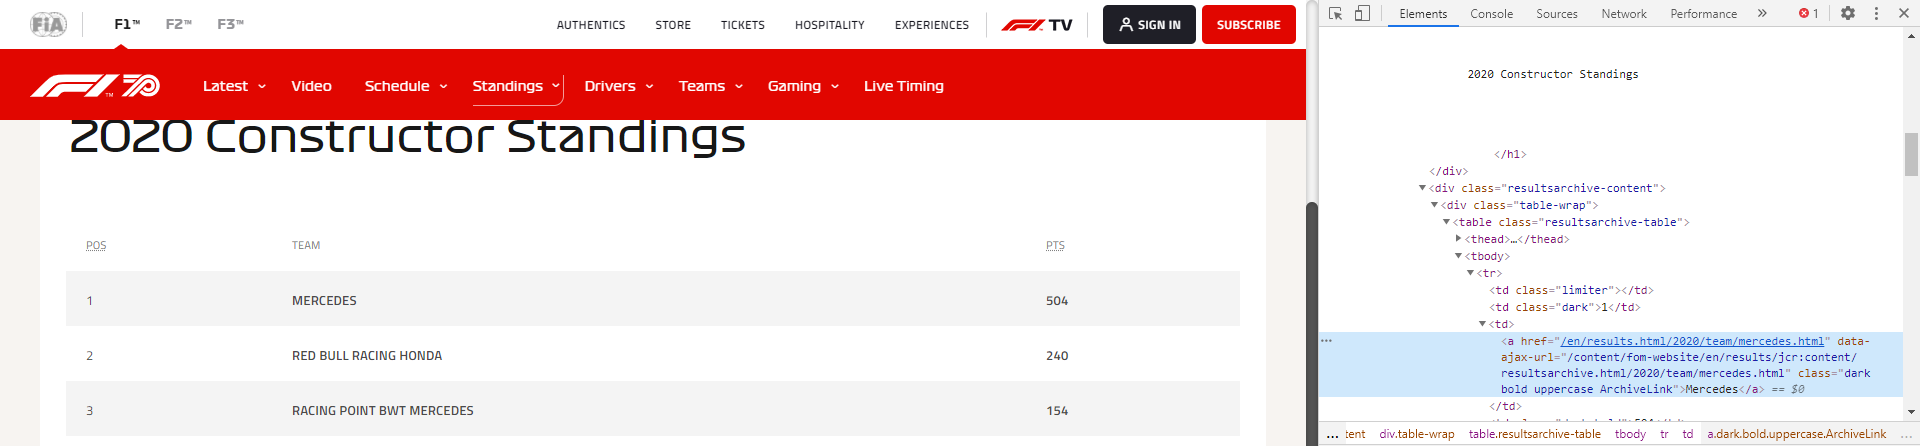

## 2. Start the web scraping
Now that we have a basic idea of what scraping is and what the page we're interested in is, we can start to actualy scrape the data from the page. We should first get the html code of the page. To do this, we'll use the [requests](https://requests.readthedocs.io/en/master/) library. This can be installed with the following command.

In [ ]:
! pip install requests

Then to get the html from our desired page, we'll first store the year in which we're interested in a variable. This variable can then be used in an f-string to complete the full url. (Note that you need Python version 3.6 or higher to work with f-strings. If you don't have it you can use the older way of formatting)<br>
Note that this code performs an HTTP request to our created url. Now page should be a response object from which we can get all the information we need. We can print the status code to see if everything worked and we got a 200 status code so everything looks good so far. 

In [ ]:
import requests

year = 2020
url = f"https://www.formula1.com/en/results.html/{year}/team.html"

page = requests.get(url)

print(page.status_code)

200


We can look at the content of the response which contains the html code. We can print it here but it is just a messy bunch of html. With Beautiful Soup however, we can format it so that it looks a bit more readable.

In [ ]:
print(page.content)

## 3. Parse the html code with Beautiful Soup
Now we know that we have our html page content in our response object, we can parse our html code. Here we'll finally start to use Beautiful Soup. Just like requests, we can easily install it with a pip command. Once that is done, we can create a Beautiful Soup object by passing in the page content and specifying the html parser of our choice. In this case we'll use the standard Python html parser. 

In [ ]:
! pip install bs4

In [ ]:
from bs4 import BeautifulSoup as bs

soup = bs(page.content, "html.parser")

Now we can use the prettify method on the soup object to create a nicely formatted string. As you can see, this way, the html code is a lot more readable than when we printed it before.

In [ ]:
print(soup.prettify())

Ok, so now we need to look for our table. We've seen before that it was contained in the \<table> tags. We can use the find_all() method and give "table" as an argument. This should then return a list of all the table elements in our soup object. We could also use find() but this will return the first table that it finds. It might be possible that there are multiple tables on the page so we first want to check that out with find_all().

In [ ]:
tables = soup.find_all("table")

print(len(tables))

1


We see that the length of the tables list is 1 which is good news. It means that we don't need to further differentiate between the tables. Now let's take the first (and only element) of that list and assign it to table. Then we can print it and see how we should progress.

In [ ]:
table = tables[0]

print(table.prettify())

<table class="resultsarchive-table">
 <thead>
  <tr>
   <th class="limiter">
   </th>
   <th>
    <abbr title="Position">
     Pos
    </abbr>
   </th>
   <th>
    Team
   </th>
   <th>
    <abbr title="Points">
     PTS
    </abbr>
   </th>
   <th class="limiter">
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td class="limiter">
   </td>
   <td class="dark">
    1
   </td>
   <td>
    <a class="dark bold uppercase ArchiveLink" data-ajax-url="/content/fom-website/en/results/jcr:content/resultsarchive.html/2020/team/mercedes.html" href="/en/results.html/2020/team/mercedes.html">
     Mercedes
    </a>
   </td>
   <td class="dark bold">
    504
   </td>
   <td class="limiter">
   </td>
  </tr>
  <tr>
   <td class="limiter">
   </td>
   <td class="dark">
    2
   </td>
   <td>
    <a class="dark bold uppercase ArchiveLink" data-ajax-url="/content/fom-website/en/results/jcr:content/resultsarchive.html/2020/team/red_bull_racing_honda.html" href="/en/results.html/2020/team/red_bull_racing_h

### 3.1 Extracting the header information
We can see that the table consists of a \<thead> part and a \<tbody> part. The head contains the names of the columns such as Pos (Position), Team and PTS (Points). We can see that in the text, it displays abbreviations but in the \<abbr> tags, we find the full names. Let's extract these full names and put them in a list which can be used as the header in a pandas dataframe. We know for sure that there's only 1 \<thead> tag in the table so we can now use find(). This just returns an object instead of a list so this makes things a bit easier.

In [ ]:
thead = table.find("thead")

print(thead.prettify())

<thead>
 <tr>
  <th class="limiter">
  </th>
  <th>
   <abbr title="Position">
    Pos
   </abbr>
  </th>
  <th>
   Team
  </th>
  <th>
   <abbr title="Points">
    PTS
   </abbr>
  </th>
  <th class="limiter">
  </th>
 </tr>
</thead>



We see that the first and last <\th> elements don't contain any useful information. So when we get all the \<th> elements using find_all(), we can leave out the first and last ones.

In [ ]:
ths = thead.find_all("th")
ths = ths[1:-1]

print(ths)

[<th><abbr title="Position">Pos</abbr></th>, <th>Team</th>, <th><abbr title="Points">PTS</abbr></th>]


Now we need to get the information from each of the remaining \<th> tags. All these \<th> elements are in a list so we can itterate over it. Then we can check if it has an \<abbr> element contained in it. If it does, we need to get the value of the title attribute from the \<abbr> element. If it doesn't, we just need to get the string.

In [ ]:
headers = []

for th in ths:
    if th.find("abbr"):
        header_name = th.abbr["title"]
    else:
        header_name = th.string
    
    headers.append(header_name)
print(headers)

['Position', 'Team', 'Points']


When there was an \<abbr> element, note that we used th.abbr\["title"]. We could have done this as well using th.find("abbr") as th.abbr just finds the first \<abbr> element. With the [], we select the value of the title attribute. 

### 3.2 Extracting the body information

Let's focus on the body now which is where the interesting information is. Note that we use the . notation again here as it's just easier. We know there's only 1 \<tbody> element here. We'll also print it so that we can further examine it.

In [ ]:
tbody = table.tbody

print(tbody.prettify())

<tbody>
 <tr>
  <td class="limiter">
  </td>
  <td class="dark">
   1
  </td>
  <td>
   <a class="dark bold uppercase ArchiveLink" data-ajax-url="/content/fom-website/en/results/jcr:content/resultsarchive.html/2020/team/mercedes.html" href="/en/results.html/2020/team/mercedes.html">
    Mercedes
   </a>
  </td>
  <td class="dark bold">
   504
  </td>
  <td class="limiter">
  </td>
 </tr>
 <tr>
  <td class="limiter">
  </td>
  <td class="dark">
   2
  </td>
  <td>
   <a class="dark bold uppercase ArchiveLink" data-ajax-url="/content/fom-website/en/results/jcr:content/resultsarchive.html/2020/team/red_bull_racing_honda.html" href="/en/results.html/2020/team/red_bull_racing_honda.html">
    Red Bull Racing Honda
   </a>
  </td>
  <td class="dark bold">
   240
  </td>
  <td class="limiter">
  </td>
 </tr>
 <tr>
  <td class="limiter">
  </td>
  <td class="dark">
   3
  </td>
  <td>
   <a class="dark bold uppercase ArchiveLink" data-ajax-url="/content/fom-website/en/results/jcr:content/resul

The we can see that there are multiple table rows (\<tr>). Each \<tr> unsurprisingly corresponds with one row in the table on the website. So a good start would be to get a list with all the rows. This is easy again with the find_all() method. We can see that there are 10 rows which is what we would expect as there are 10 teams participating in the 2020 constructors championship.

In [ ]:
rows = tbody.find_all("tr")

print(f"There are {len(rows)} rows.")

There are 10 rows.


Let us now have a look at the first row to see how we can get the desired information from it.

In [ ]:
first_row = rows[0]
print(first_row.prettify())

<tr>
 <td class="limiter">
 </td>
 <td class="dark">
  1
 </td>
 <td>
  <a class="dark bold uppercase ArchiveLink" data-ajax-url="/content/fom-website/en/results/jcr:content/resultsarchive.html/2020/team/mercedes.html" href="/en/results.html/2020/team/mercedes.html">
   Mercedes
  </a>
 </td>
 <td class="dark bold">
  504
 </td>
 <td class="limiter">
 </td>
</tr>



We can see a similar structure as the one we've seen in the table header (\<thead>) but instead of table header cells (\<th>), we're dealing with table data cells (\<td>). Last time we selected all the \<th> elements and put them in a list and then itterated over them. This time however we'll just go looking for the correct element using for example the CSS class or the fact that there's a link in the Team \<td> element.<br>

### 3.2.1 Searching by CSS class
When we look at the \<td> element holding the position, we can see that it has a "dark" class. We see however that the points column also has class dark but also bold. This is something we can use. In our first_row object, we can use find("td", class_="dark"). This looks for the first \<td> element that has a class of "dark". Note that we need to write class_ with the underscore as class is a reserved keyword in Python.<br>
If we would have used the find_all() method, we would have had a list containing both the position and points data. So this is why we use find() as this finds the first element of that type with the "dark" class.
When we want to get the number of points for a team, we can use the same method but put "dark bold" as class.

In [ ]:
position = first_row.find("td", class_="dark").string
points = first_row.find("td", class_="dark bold").string

print(f"The team in postition {position} has {points} points.")

The team in postition 1 has 504 points.


Now we just need to get the team name which is again easy to find as that's in the only \<a> element. So we can just get the string from the first object that we find.

In [ ]:
team = first_row.a.string

print(team.string)

Mercedes


### 3.2.2 Creating a function
Now we know how we can get all the bits of information from a table row, we can create a function that returns the postion, team name and points for each row in a list.

In [ ]:
def extract_row_info(row):
    position = row.find("td", class_="dark").string
    team = row.a.string
    points = row.find("td", class_="dark bold").string
    
    return [position, team, points]

### 3.2.1 Exctracting all the body data
A little bit earlier, we stored all the rows of the table body in rows. Now we can itterate over this rows list and use the extract_row_info function on each row. We create an empty data list and then append the data of each row to that data list. When we print the data list after we've itterated over each row in rows, we see that we have all the data we need in it.

In [ ]:
data = []

for row in rows:
    row_info = extract_row_info(row)
    
    data.append(row_info)
    
print(data)

[['1', 'Mercedes', '504'], ['2', 'Red Bull Racing Honda', '240'], ['3', 'Racing Point BWT Mercedes', '154'], ['4', 'McLaren Renault', '149'], ['5', 'Renault', '136'], ['6', 'Ferrari', '130'], ['7', 'AlphaTauri Honda', '89'], ['8', 'Alfa Romeo Racing Ferrari', '8'], ['9', 'Haas Ferrari', '3'], ['10', 'Williams Mercedes', '0']]


## 3.3 Putting the data in a pandas DataFrame
So now we got the column names stored in headers and the data stored in data. We can now store this information in a pandas DataFrame. This is ideally suited to store data from a table. If you haven't installed it yet, it's again easy to do with a simple pip command.

In [ ]:
! pip install pandas

We can now create our DataFrame and display it. We can indeed see that we have the table with the information as it appears on the F1 website. In the next notebook, we'll explore how we can extract the championship results of every season so far.

In [ ]:
import pandas as pd

# Create the DataFrame with the previously scraped data.
constructor_standings = pd.DataFrame(data, columns=headers)

constructor_standings

,Position,Team,Points
0,1,Mercedes,504
1,2,Red Bull Racing Honda,240
2,3,Racing Point BWT Mercedes,154
3,4,McLaren Renault,149
4,5,Renault,136
5,6,Ferrari,130
6,7,AlphaTauri Honda,89
7,8,Alfa Romeo Racing Ferrari,8
8,9,Haas Ferrari,3
9,10,Williams Mercedes,0
